In [48]:
import os
os.chdir('..')
from bilevel.synth_datagen import SynthGenLinear

In [49]:
import numpy as np
import pandas as pd

In [50]:
params = {'samples': 100000, 'dim':20, 
        'group_dict': {'SEX':['male', 'female'], 'RACE': ['white', 'black', 'two-or-more','some-other', 'asian', 'native-am']},
        'prob_dict': {'SEX': [0.5, 0.5], 'RACE': [0.61, 0.12, 0.1, 0.08, 0.06, 0.03]},
        'feat_lo': 0.0, 'feat_hi': 1.0, 'w_lo': 0.0, 'w_hi': 100.0, 
        'label_noise_width':100, 'drop_sensitive':False
        }
syn_ob = SynthGenLinear(**params)

In [ ]:
syn_ob.df[['active_labels', 'bin_masked_labels']]
df = syn_ob.df

In [ ]:
filter_feature = [col for col in df if col.startswith('x')]
filter_label = [col for col in df if col.startswith('y')]
filter_group = [col for col in df if col.startswith('g')]
print(filter_feature, filter_label, filter_group)

['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19'] ['y_male', 'y_female', 'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian', 'y_native-am'] ['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']


In [ ]:
df.columns

Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
       'x_19', 'g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more',
       'g_some-other', 'g_asian', 'g_native-am', 'y_male', 'y_female',
       'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian',
       'y_native-am', 'active_labels', 'bin_masked_labels'],
      dtype='object')

In [ ]:
df['active_labels']

0         [4.759823890644501, 4.118582563175968]
1         [5.825500197307057, 4.996523637512929]
2       [3.8400350629697524, 3.7982976221734908]
3        [4.678205010240008, 4.3372413917480195]
4         [5.367336856748316, 4.095341741671556]
                          ...                   
9995     [4.752628940723493, 3.8593801756674564]
9996      [4.024836664995607, 3.165233838337267]
9997     [4.656866353769164, 3.5379825419609885]
9998      [4.442073823647269, 4.233713857034191]
9999      [5.504367346566517, 4.346461476026054]
Name: active_labels, Length: 10000, dtype: object

In [ ]:
df['y_min_active'] = df.apply(lambda x: np.min(x['active_labels']), axis=1)
df['y_max_active'] = df.apply(lambda x: np.max(x['active_labels']), axis =1)
df['y_mean_active'] = df.apply(lambda x: np.mean(x['active_labels']), axis =1)


In [ ]:
df

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,y_black,y_two-or-more,y_some-other,y_asian,y_native-am,active_labels,bin_masked_labels,y_min_active,y_max_active,y_mean_active
0,0.155141,0.153212,0.404544,0.874220,0.538219,0.858930,0.204999,0.953292,0.258100,0.426815,...,5.001843,4.586682,3.990731,4.798298,6.042650,"[4.759823890644501, 4.118582563175968]","[4.759823890644501, 0.0, 4.118582563175968, 0....",4.118583,4.759824,4.439203
1,0.073679,0.502093,0.329670,0.927225,0.158273,0.971968,0.895219,0.178355,0.656396,0.622833,...,5.209901,5.746388,4.969511,6.335954,6.414454,"[5.825500197307057, 4.996523637512929]","[0.0, 5.825500197307057, 4.996523637512929, 0....",4.996524,5.825500,5.411012
2,0.641142,0.092470,0.124411,0.427191,0.543468,0.425972,0.786278,0.868249,0.308234,0.326483,...,3.685736,3.798298,3.463642,3.941527,4.446552,"[3.8400350629697524, 3.7982976221734908]","[0.0, 3.8400350629697524, 0.0, 0.0, 3.79829762...",3.798298,3.840035,3.819166
3,0.182101,0.486635,0.127706,0.671128,0.097394,0.410181,0.456580,0.487363,0.193097,0.613554,...,4.374727,4.337241,3.878515,4.779392,4.840211,"[4.678205010240008, 4.3372413917480195]","[4.678205010240008, 0.0, 0.0, 0.0, 4.337241391...",4.337241,4.678205,4.507723
4,0.884903,0.289509,0.496345,0.771282,0.916529,0.680323,0.238675,0.095646,0.173679,0.656747,...,5.276508,5.035174,3.978178,5.248452,5.465382,"[5.367336856748316, 4.095341741671556]","[0.0, 5.367336856748316, 4.095341741671556, 0....",4.095342,5.367337,4.731339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.530447,0.982404,0.411448,0.140082,0.406428,0.077133,0.670902,0.247396,0.627485,0.221134,...,3.759809,5.123096,4.338662,4.839475,4.064662,"[4.752628940723493, 3.8593801756674564]","[0.0, 4.752628940723493, 3.8593801756674564, 0...",3.859380,4.752629,4.306005
9996,0.736691,0.924662,0.683965,0.342347,0.450616,0.475079,0.405864,0.038442,0.704625,0.385206,...,3.577186,4.169680,3.976061,4.712305,4.142919,"[4.024836664995607, 3.165233838337267]","[0.0, 4.024836664995607, 3.165233838337267, 0....",3.165234,4.024837,3.595035
9997,0.228007,0.141248,0.520737,0.190701,0.264753,0.033608,0.519715,0.211977,0.092672,0.373980,...,3.531980,5.015743,3.901951,4.577133,4.194621,"[4.656866353769164, 3.5379825419609885]","[0.0, 4.656866353769164, 3.5379825419609885, 0...",3.537983,4.656866,4.097424
9998,0.634692,0.161229,0.338137,0.736687,0.942537,0.383611,0.312602,0.943987,0.275751,0.090742,...,4.204859,4.433244,3.879127,4.869985,4.669256,"[4.442073823647269, 4.233713857034191]","[0.0, 4.442073823647269, 4.233713857034191, 0....",4.233714,4.442074,4.337894


# Even though labels for each group are realizable by linear, their combination is not linear!
Single linear learner unable to capture this, and as expected cannot get a perfect r2

In [ ]:
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df[filter_feature], 
                                                    df['y_min_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for min of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.7252889871153351 0.7103774201393394


In [ ]:
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df[filter_feature], 
                                                    df['y_max_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for min of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.8204647551562826 0.813526806332526


In [ ]:
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df[filter_feature], 
                                                    df['y_mean_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for min of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.8379149511270622 0.8258284602213225


In [ ]:
# for mean of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.8379149511270622 0.8258284602213225


# Batch comparing models across different groups, are they similar or not
- use model trained on data for one group, test it on data of another (test its r2 score on data of other)

In [ ]:
y_all = [col for col in df if col.startswith('y')]
print(y_all)
print(filter_group)
print(filter_feature)

['y_male', 'y_female', 'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian', 'y_native-am', 'y_min_active', 'y_max_active', 'y_mean_active']
['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']
['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19']


In [ ]:
df.drop(y_all, axis=1).head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,g_male,g_female,g_white,g_black,g_two-or-more,g_some-other,g_asian,g_native-am,active_labels,bin_masked_labels
0,0.155141,0.153212,0.404544,0.874220,0.538219,0.858930,0.204999,0.953292,0.258100,0.426815,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"[4.759823890644501, 4.118582563175968]","[4.759823890644501, 0.0, 4.118582563175968, 0...."
1,0.073679,0.502093,0.329670,0.927225,0.158273,0.971968,0.895219,0.178355,0.656396,0.622833,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"[5.825500197307057, 4.996523637512929]","[0.0, 5.825500197307057, 4.996523637512929, 0...."
2,0.641142,0.092470,0.124411,0.427191,0.543468,0.425972,0.786278,0.868249,0.308234,0.326483,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,"[3.8400350629697524, 3.7982976221734908]","[0.0, 3.8400350629697524, 0.0, 0.0, 3.79829762..."
3,0.182101,0.486635,0.127706,0.671128,0.097394,0.410181,0.456580,0.487363,0.193097,0.613554,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"[4.678205010240008, 4.3372413917480195]","[4.678205010240008, 0.0, 0.0, 0.0, 4.337241391..."
4,0.884903,0.289509,0.496345,0.771282,0.916529,0.680323,0.238675,0.095646,0.173679,0.656747,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"[5.367336856748316, 4.095341741671556]","[0.0, 5.367336856748316, 4.095341741671556, 0...."


In [ ]:
# tranining on data for only each group
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df.drop(y_all, axis = 1), 
                                                    df['y_max_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)

models_lr_dict = {}
group_sizes = {}

for g in filter_group:
    indices = (X_train[g] == 1)
    model_lr = LinearRegression()
    model_lr.fit(X_train[indices][filter_feature], y_train[indices])
    key = g
    group_sizes[key] = indices.sum() #sum of all the trues
    models_lr_dict[key] = model_lr

In [ ]:
for g in filter_group:
    indices = (X_test[g] == 1)
    key = g
    r2_score_lr = models_lr_dict[key].score(X_test[indices][filter_feature], y_test[indices])
    print(f" {key}, test group size {group_sizes[key]}  r2 score for least squares is {r2_score_lr:.4f}")

 g_male, test group size 4005  r2 score for least squares is 0.9376
 g_female, test group size 3995  r2 score for least squares is 0.9358
 g_white, test group size 4839  r2 score for least squares is 0.8259
 g_black, test group size 990  r2 score for least squares is 0.8731
 g_two-or-more, test group size 809  r2 score for least squares is 0.9112
 g_some-other, test group size 677  r2 score for least squares is 0.8414
 g_asian, test group size 464  r2 score for least squares is 0.9573
 g_native-am, test group size 221  r2 score for least squares is 0.9330


In [ ]:
def cross_test_models(model_dict: dict):
    '''
        model_dict: maps keys to linear model, these linear models are already trained and have weights
        sex_cats: labels for the different sexes
        race_cats: labels for the different races
        This function computes the performance of one model on another models data

        With an example, model_dict['SEX_1'] has the linear model trained only of those points which have SEX == 1
        we will test its performance on all the other groups data.
    '''
    keys = list(model_dict.keys())
    l = len(keys)
    mat_2d = np.zeros((l, l))
    for i in range(l):
        model_i = model_dict[keys[i]]
        for j in range(l):
            key = keys[j]
            indices_j = (X_test[key] == 1)
            mat_2d[i, j] = model_i.score(X_test[indices_j][filter_feature], y_test[indices_j]) # how model i performs on test data meant for model j, R2 score
    return mat_2d, keys

In [ ]:
import numpy as np
crossmat, keys = cross_test_models(models_lr_dict)
print(crossmat, keys)

[[0.93764369 0.46908747 0.69007012 0.78090981 0.72667434 0.79105751
  0.64999045 0.55860224]
 [0.43047756 0.93582948 0.69876052 0.67638046 0.66633059 0.6419913
  0.56410226 0.44000884]
 [0.79019657 0.82183156 0.82590626 0.8440052  0.76176469 0.83343603
  0.63743126 0.55906589]
 [0.80292882 0.79651154 0.7992057  0.87312348 0.79272727 0.8148006
  0.69386252 0.63052202]
 [0.69890588 0.70018897 0.64945988 0.6727517  0.91124999 0.70042918
  0.84620972 0.72913135]
 [0.8216142  0.78469998 0.817942   0.85005805 0.76802024 0.84136963
  0.63887577 0.58656444]
 [0.61813957 0.58668737 0.53261617 0.56882885 0.77279355 0.6076087
  0.95725568 0.77550124]
 [0.528061   0.4866501  0.41378418 0.56346643 0.66567139 0.53086431
  0.76895375 0.93301924]] ['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']


<Axes: >

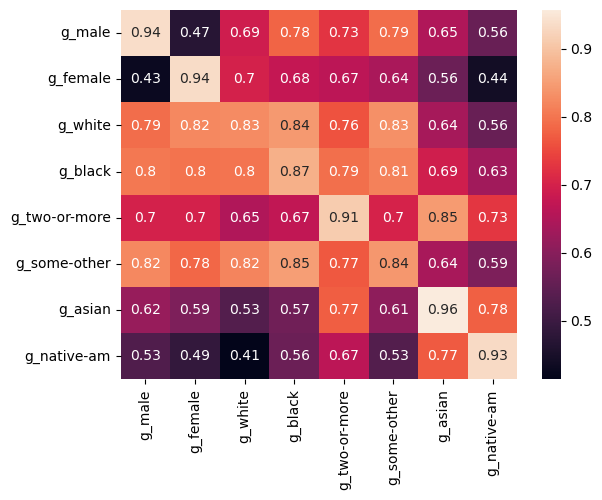

In [ ]:
import seaborn as sns # for data visualization
sns.heatmap(crossmat, annot=True, xticklabels=keys, yticklabels=keys)

# Online pipeline

In [ ]:
from bilevel.OnlineLinearExpert import *
from bilevel.build_all_models import *

In [ ]:
# # reproducible seed for uniforms
# params = {'samples': 10000, 'dim':20, 
#         'group_dict': {'SEX':['male', 'female'], 'RACE': ['white', 'black', 'two-or-more','some-other', 'asian', 'native-am']},
#         'prob_dict': {'SEX': [0.5, 0.5], 'RACE': [0.61, 0.12, 0.1, 0.08, 0.06, 0.03]},
#         'feat_lo': 0.0, 'feat_hi': 100.0, 'w_lo': 0.0, 'w_hi': 100.0, 
#         'label_noise_width':100, 'drop_sensitive':True
#         }
# syn_ob = SynthGenLinear(**params)
# df = syn_ob.df

In [ ]:
print(df.columns)
filter_feature = [col for col in df if col.startswith('x')]
filter_label = [col for col in df if col.startswith('y')]
filter_group = [col for col in df if col.startswith('g')]
print(filter_feature, filter_label, filter_group)

Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
       'x_19', 'g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more',
       'g_some-other', 'g_asian', 'g_native-am', 'y_male', 'y_female',
       'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian',
       'y_native-am', 'active_labels', 'bin_masked_labels', 'y_min_active',
       'y_max_active', 'y_mean_active'],
      dtype='object')
['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19'] ['y_male', 'y_female', 'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian', 'y_native-am', 'y_min_active', 'y_max_active', 'y_mean_active'] ['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']


In [ ]:
df['y_min_active'] = df.apply(lambda x: np.min(x['active_labels']), axis=1)
df['y_max_active'] = df.apply(lambda x: np.max(x['active_labels']), axis =1)
df['y_mean_active'] = df.apply(lambda x: np.mean(x['active_labels']), axis =1)

In [ ]:
np.sum(syn_ob.A_t, axis = 0), np.sum(syn_ob.A_t, axis=1)

(array([5027., 4973., 6073., 1228., 1014.,  816.,  587.,  282.]),
 array([2., 2., 2., ..., 2., 2., 2.]))

In [ ]:
# need to also minmax scale? so that all in 0-1
from bilevel.utils import numeric_scaler
X_dat = df[filter_feature]
y_dat = df[['y_mean_active']]
A_t = syn_ob.A_t

X_dat = numeric_scaler(X_dat, X_dat.columns)
y_dat = numeric_scaler(y_dat, y_dat.columns)
y_dat = y_dat['y_mean_active']

In [ ]:
X_dat.shape, y_dat.shape, A_t.shape

((10000, 20), (10000,), (10000, 8))

In [ ]:
dirname = './synthetic_res_models/baseline/'
filename = 'leastsq_0-1uniform'

In [ ]:
exp_ls = OnlineLinearExpert(X_dat, y_dat, l2_pen = 0.0)
b_lsbase = build_baseline_alwayson(dirname, filename, A_t, exp_ls)

100%|██████████| 10000/10000 [00:06<00:00, 1504.72it/s]


In [ ]:
dirname = './synthetic_res_models/Anh/'
filename = 'leastsq_0-1uniform'
experts_ls = [OnlineLinearExpert(X_dat, y_dat, l2_pen = 0.0) for _ in range(A_t.shape[1])]
b_Anh = build_Anh(dirname, filename, A_t, experts_ls)

100%|██████████| 10000/10000 [00:13<00:00, 721.58it/s]


In [ ]:
for gnum in range(A_t.shape[1]):
    baseline_cl = b_lsbase.expert.cumloss_groupwise[gnum][-1]
    Anh_cl = b_Anh.Anh.cuml_loss_curve[gnum][-1]
    print(f'''Group {gnum}, Baseline : {baseline_cl},  Anh : {Anh_cl}''')
    print(f'''Is Anh better {Anh_cl <= baseline_cl}''')

Group 0, Baseline : 20.056295184566405,  Anh : 19.624689343178613
Is Anh better True
Group 1, Baseline : 19.98326887484785,  Anh : 18.896070999353483
Is Anh better True
Group 2, Baseline : 17.874064786736703,  Anh : 16.42003938799152
Is Anh better True
Group 3, Baseline : 4.240543359342536,  Anh : 4.279928920691513
Is Anh better False
Group 4, Baseline : 7.633542648433164,  Anh : 7.159354809488445
Is Anh better True
Group 5, Baseline : 2.469761230777945,  Anh : 2.745513034114098
Is Anh better False
Group 6, Baseline : 5.276173980498226,  Anh : 5.16505072717233
Is Anh better True
Group 7, Baseline : 2.5454780536257298,  Anh : 2.750873463074136
Is Anh better False
